In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [3]:
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.svm import SVC

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
svm = SVC(kernel='linear', probability=True)

In [8]:
svm.fit(X_train_std,y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [10]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [11]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [12]:
svm.predict_proba(X_test_std)

array([[0.95047182, 0.04952818],
       [0.00771949, 0.99228051],
       [0.97419445, 0.02580555],
       [0.00666033, 0.99333967],
       [0.01713633, 0.98286367],
       [0.11936953, 0.88063047],
       [0.98455141, 0.01544859],
       [0.00497807, 0.99502193],
       [0.00892569, 0.99107431],
       [0.01591708, 0.98408292],
       [0.02449364, 0.97550636],
       [0.03035487, 0.96964513],
       [0.00829168, 0.99170832],
       [0.98071883, 0.01928117],
       [0.96289483, 0.03710517],
       [0.94282376, 0.05717624],
       [0.98845868, 0.01154132],
       [0.87718921, 0.12281079],
       [0.98076185, 0.01923815],
       [0.95706981, 0.04293019],
       [0.95047182, 0.04952818],
       [0.03499413, 0.96500587],
       [0.95043558, 0.04956442],
       [0.03756288, 0.96243712],
       [0.96789821, 0.03210179],
       [0.97017852, 0.02982148],
       [0.96286743, 0.03713257],
       [0.02123026, 0.97876974],
       [0.04028326, 0.95971674],
       [0.0062046 , 0.9937954 ]])

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

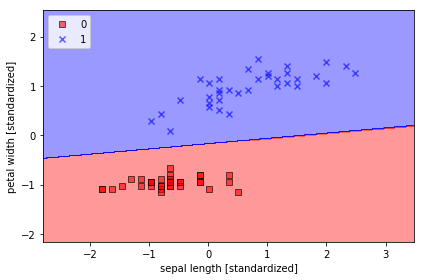

In [14]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()